## Dataset
I downloaded car-crash and bike-crash images from Google Images. I used a Google Chrome extension 'Fatkun Batch Download Image' that downloads batches of selected images (Link: https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf). 

In [64]:
from fastai import *
from fastai.vision import *

In [42]:
path = r'C:\Users\Owner\Desktop\fast.ai\1. Deep Learning for coders\lesson 1\data\accidents'

## Loading and looking at the dataset

In [43]:
classes = ['bike_accidents', 'car_accidents']
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs = 16).normalize(imagenet_stats)

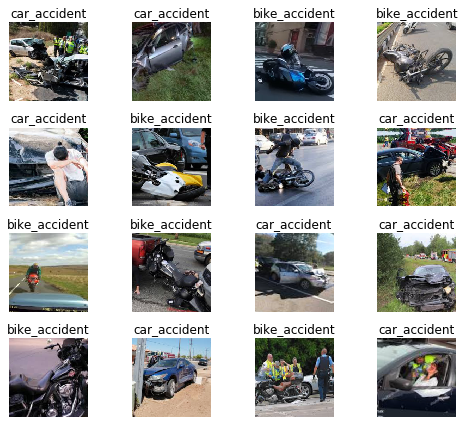

In [44]:
data.show_batch(rows = 4, figsize = (7,6))

In [45]:
print(data.classes)
len(data.classes),data.c

['bike_accident', 'car_accident']


(2, 2)

## Training: RESNET34

In [46]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)  # Build convnet style learner.

In [47]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [49]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.931099,0.522911,0.155340,03:18
1,0.682981,0.715333,0.223301,03:18
2,0.600134,0.478917,0.165049,03:15
3,0.505357,0.425505,0.165049,03:15


### Observation
After training the model on our dataset, we see that we get an accuracy of 85%. 

In [50]:
learn.save('stage-1')

## Results and interpretation

We use ClassificationInterpretation function to plot the validation data samples that have the highest loss values (i.e. the samples for which the model predicted a very low probability of the image belonging to its actual class).

In [51]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

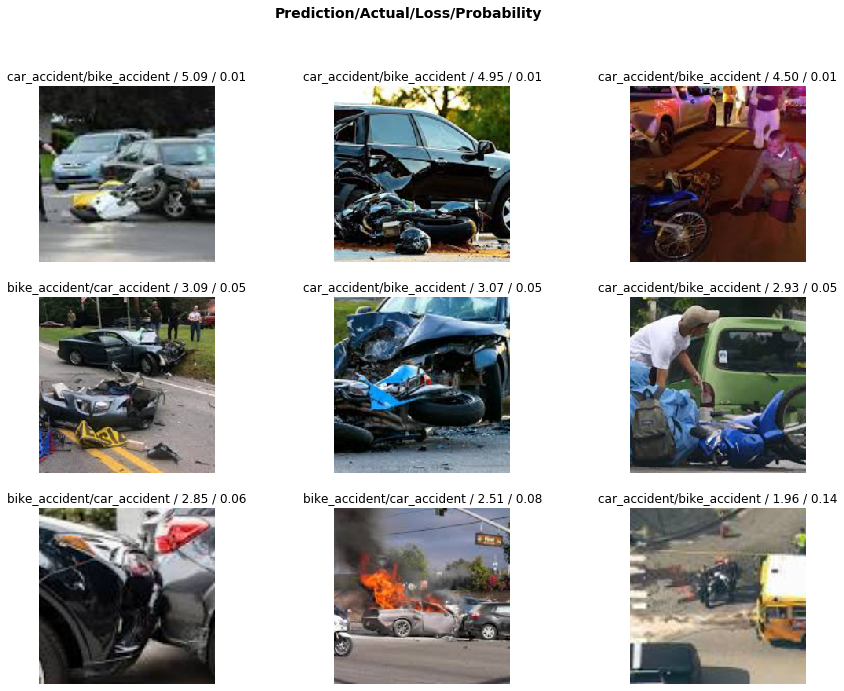

In [52]:
interp.plot_top_losses(9, figsize=(15,11))

We see that most of the misclassified data samples involve both a car and a bike in the accident. This may confuse our model.

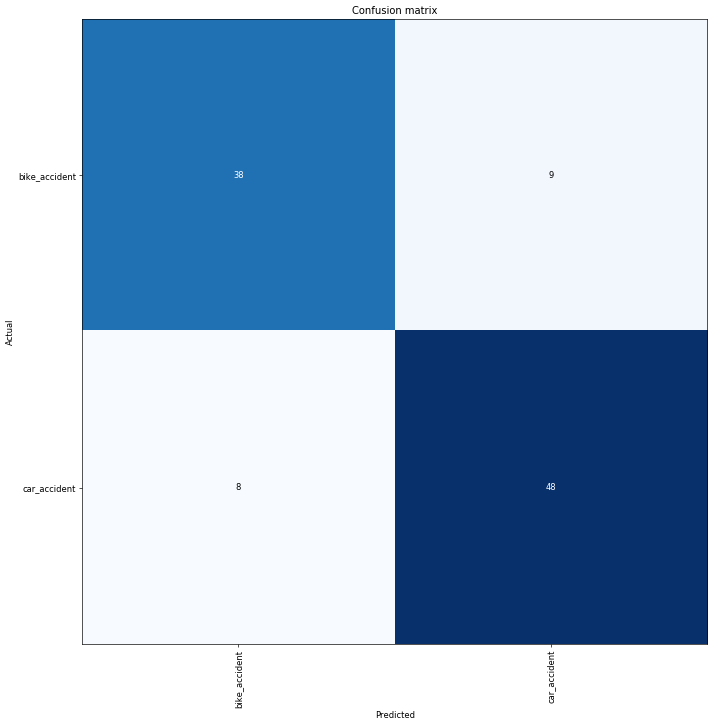

In [53]:
# Confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Improving model performance
Since our model is working as we expect it to, we will **unfreeze** our model, **fine-tune** it, and see how **learning-rates** affect our model, and try to improve model performance.

In [55]:
learn.unfreeze()

In [56]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.995786,1.099643,0.233010,03:58


In [57]:
learn.load('stage-1');

In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


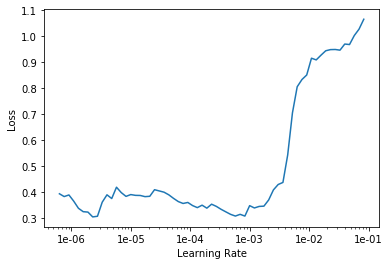

In [59]:
learn.recorder.plot() 

In the above plot, we see how our loss varies as the learning_rate changes. We see thst the lowest losses are recorded when our learning_rate vary between 1e-05 and 1e-03.

We will now try to improve the performance by changing our lr_rate limit to *1e-05* and *1e-03*. If this doesn't give us better results, we can always go back to our previous range.

In [60]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.348914,0.233030,0.077670,03:56
1,0.287096,0.225601,0.067961,03:52


After fine-tuning and changing learning-rates, we see that our model performance improved to 94%.

In [61]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

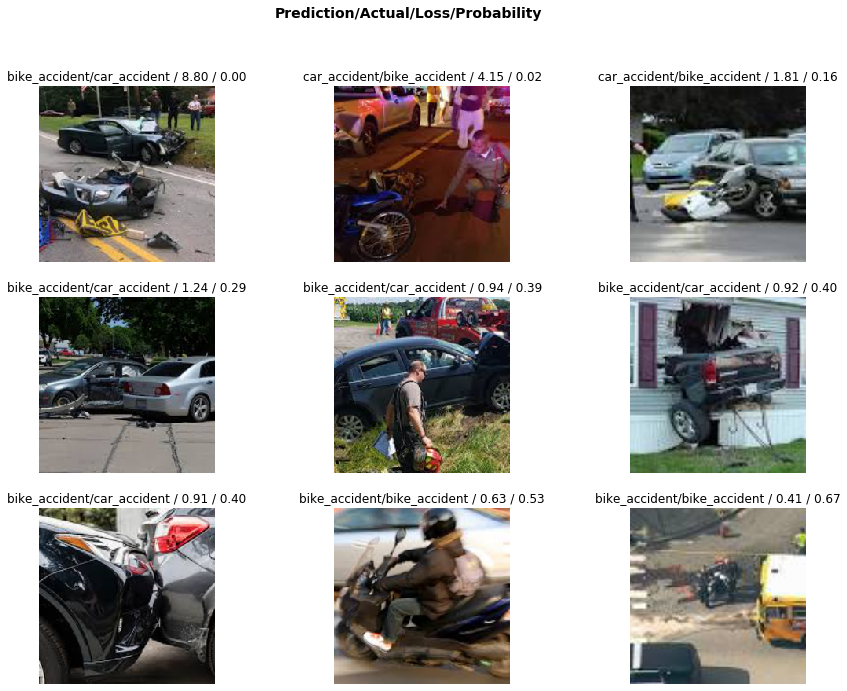

In [62]:
interp.plot_top_losses(9, figsize=(15,11))

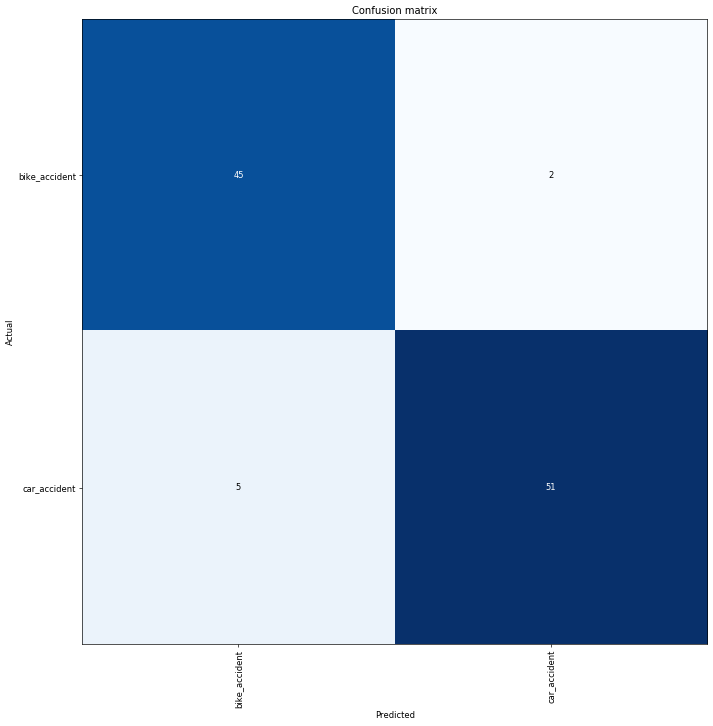

In [63]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Predictions
Making predictions on a random image taken from Google Images to see if our model can correctly classify on unseen data.

The model classified this accident as a car_accident, which is correct!


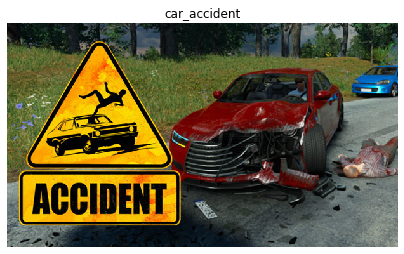

In [88]:
img = open_image(r'C:\Users\Owner\Desktop\fast.ai\1. Deep Learning for coders\lesson 1\data\test_img.jpg')
prediction = learn.predict(img)
img.show(figsize=(7,5), title = str(prediction[0]))
print("The model classified this accident as a " + str(prediction[0]) + ", which is correct!")